In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json
# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#download the dataset for the dog-breed identification challenge https://www.kaggle.com/c/dog-breed-identification
!kaggle competitions download -c dog-breed-identification

#unzip the downloaded files
!unzip labels.csv.zip

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 64 Nov 17 18:42 kaggle.json
  0% 0.00/214k [00:00<?, ?B/s]
100% 214k/214k [00:00<00:00, 54.7MB/s]
  0% 0.00/318k [00:00<?, ?B/s]
100% 318k/318k [00:00<00:00, 81.3MB/s]
 96% 332M/346M [00:03<00:00, 83.8MB/s]
100% 346M/346M [00:03<00:00, 98.4MB/s]
 99% 341M/345M [00:04<00:00, 94.1MB/s]
100% 345M/345M [00:04<00:00, 85.2MB/s]
Archive:  labels.csv.zip
  inflating: labels.csv              


In [0]:
import pandas as pd
import numpy as np
num_classes = 120
seed = 42
im_size = 299

df = pd.read_csv('labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)
df = df[df['breed'].isin(selected_breed_list)]
df['filename'] = df.apply(lambda x: ('train/' + x['id'] + '.jpg'), axis=1)


breeds = pd.Series(df['breed'])
print("total number of breeds to classify",len(breeds.unique()))

df.head()

total number of breeds to classify 120


,id,breed,filename
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


In [0]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def predict_from_image(img_path):

    img = image.load_img(img_path, target_size=(299, 299))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    
    pred = model.predict(img_tensor)
    sorted_breeds_list = sorted(selected_breed_list)
    predicted_class = sorted_breeds_list[np.argmax(pred)]
    
    plt.imshow(img_tensor[0])                           
    plt.axis('off')
    plt.show()

    return predicted_class


In [0]:
from keras.models import load_model
model = load_model('2018-11-15_dog_breed_model.h5')

In [0]:
!wget https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12224620/Scottish-Deerhound-On-White-03.jpg -o file.jpg

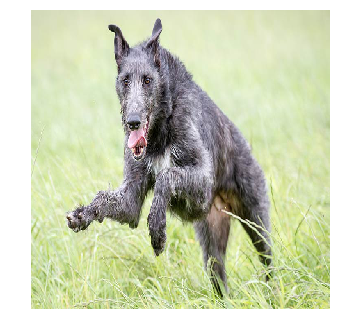

prediction scottish_deerhound


In [20]:
import urllib.request 

import time

ts = time.time()
filename = str(ts)+".jpg"
urllib.request.urlretrieve("https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12224620/Scottish-Deerhound-On-White-03.jpg",filename)
prediction = predict_from_image(filename)
os.remove(filename)
print("prediction:", prediction)